In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:

df=pd.read_csv('SampleSuperstore.csv')
df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [38]:
df.shape

(9994, 13)

### total count of variables in each column 

In [39]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

### checkin for null values

In [40]:
df.isnull().sum().sort_values(ascending =True)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###  items which has been sold the most 

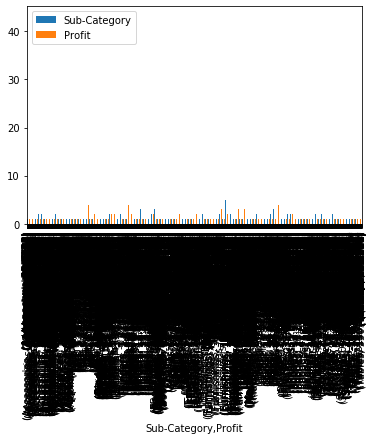

In [41]:
df.groupby(['Sub-Category'])['Sub-Category'].count()
df.groupby(['Sub-Category','Profit'])['Sub-Category','Profit'].count().plot.bar()

## the quantity which sold the most 

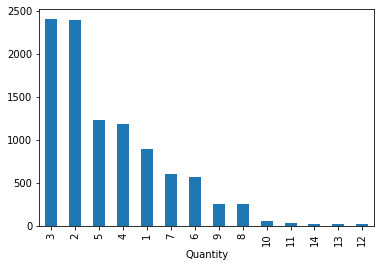

In [42]:
df.groupby(['Quantity'])['Quantity'].count()
df.groupby(['Quantity'])['Quantity'].count().sort_values(ascending =False).plot.bar()

## profits and discount based on the quantity 

In [43]:
df.groupby(['Quantity']).sum()

,Postal Code,Sales,Discount,Profit
Quantity,,,,
1,48312855,53251.9345,137.51,7440.4801
2,132436733,289091.4798,371.97,38448.4088
3,132312519,422060.6007,369.37,57015.5250
4,65341216,323670.9944,187.83,44223.3908
5,69734675,415661.6965,193.29,49516.5945
6,31489633,207122.3214,95.27,10325.4678
7,33768539,239908.3659,98.16,34286.9730
8,14569939,117760.1760,44.10,10856.7960
9,14121993,128505.5901,38.17,17687.8908


## checking if the profits are more then sales or no 

In [44]:
df[df['Sales']== df['Profit'].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


In [45]:
df[df['Sales']== df['Sales'].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [46]:
X = df.iloc[:,0:12]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
X.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20


## dependent variable

In [47]:
y.head()

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
Name: Profit, dtype: float64

#### applying  SelectKBest to extract top best feature 

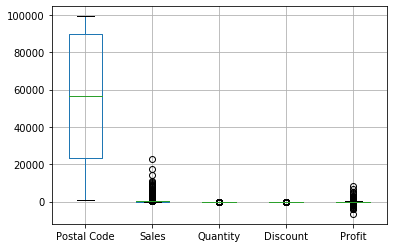

In [48]:
df.boxplot()

### corellation between SHIP_MODE , SEGMENT , AND COUNTRY WITH target variable 

In [49]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### checking the no of categories in each column

In [50]:
for col in df.columns:
    print(col,' : ', len(df[col].unique()),'labels')

Ship Mode  :  4 labels
Segment  :  3 labels
Country  :  1 labels
City  :  531 labels
State  :  49 labels
Postal Code  :  631 labels
Region  :  4 labels
Category  :  3 labels
Sub-Category  :  17 labels
Sales  :  5825 labels
Quantity  :  14 labels
Discount  :  12 labels
Profit  :  7287 labels


### MERGING THE DUMMY COLOUMNS WITH THE ORIGNAML DATASET AND DELETING THE ORIGNAL COLUMN  

In [51]:
dummies = pd.get_dummies(df.Segment)
merged  =pd.concat([df,dummies],axis = 'columns')
final = merged.drop(['Segment'],axis = "columns")
final 

,Ship Mode,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Consumer,Corporate,Home Office
0,Second Class,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,1,0,0
1,Second Class,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,1,0,0
2,Second Class,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0,1,0
3,Standard Class,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1,0,0
4,Standard Class,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,1,0,0
9990,Standard Class,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,1,0,0
9991,Standard Class,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,1,0,0
9992,Standard Class,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,1,0,0


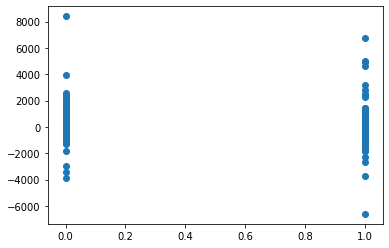

In [52]:
X = final["Consumer"]
y = final["Profit"]
plt.scatter(X,y)

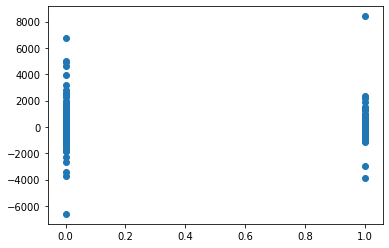

In [53]:
X = final["Corporate"]
y = final["Profit"]
plt.scatter(X,y)

## discount rearned by consumer coperate and home office w.r.t the profits 

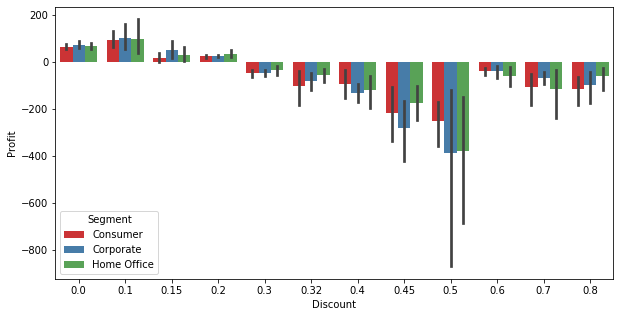

In [54]:
plt.figure(figsize =(10,5))
sns.barplot(x = 'Discount', y = 'Profit',hue ='Segment',palette = 'Set1',data = df )


###  most profit observed by technology category 

<Figure size 720x360 with 0 Axes>

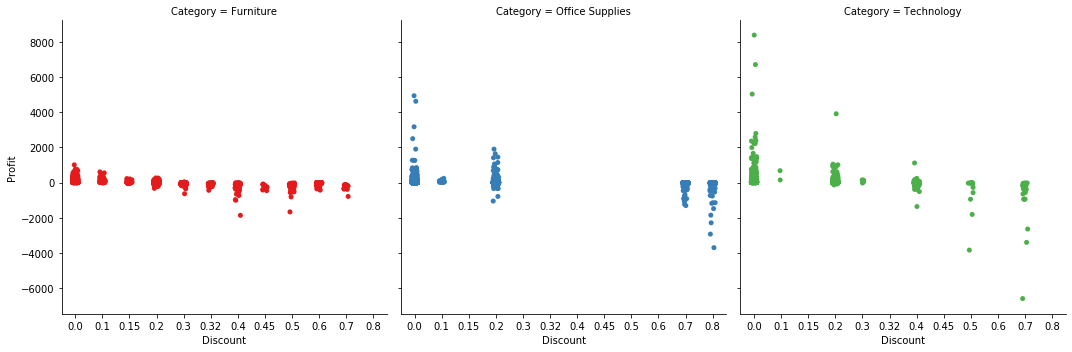

In [55]:
plt.figure(figsize =(10,5))
sns.catplot(x = 'Discount', y = 'Profit',hue ='Category',col = 'Category',palette = 'Set1',data = df )

In [63]:
table = pd.pivot_table(df,index =['Category','Sub-Category'],columns = 'Discount',values = 'Sales',aggfunc =np.mean)

<Figure size 2016x1440 with 0 Axes>

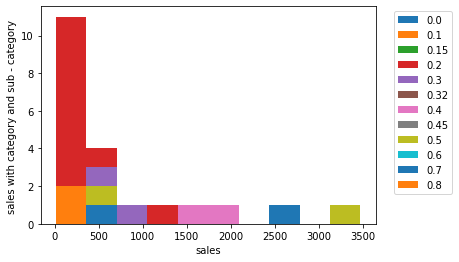

In [65]:
plt.figure(figsize =(28,20))
table.plot(kind ='hist')
plt.xlabel ('sales')
plt.ylabel('sales with category and sub - category ')
plt.legend(bbox_to_anchor=(1.04,1),loc ='upper left')
plt.show()

In [58]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## corellation of sales with profit 

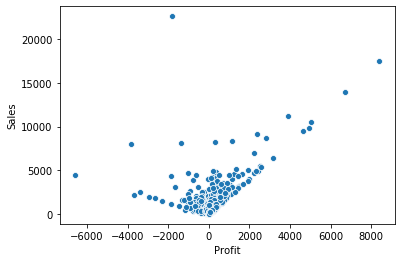

In [66]:
sns.scatterplot(df['Profit'],df['Sales'],data = df )

### when profit is maximum the discount is low and when profit is minimum discount is high 

In [72]:
df[df['Profit']==df['Profit'].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [73]:
df[df['Profit']==df['Profit'].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [74]:
#when profit is maximum the discount is low and when profit is minimum discount is high 
#most profit observed by technology category
# coperate segment earned most profits 
# the no of quatity which sold the most  is 3 
# profit incred is more when the sales are maximum 
# profits were in negitive when the sales were minimum